In [ ]:
# importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
#Reading data
df =pd.read_csv('C://Users/Faisal-Aakon/Desktop/cms.csv')

In [4]:
#checking data
df


Unnamed: 0  device_id  temperature  humidity  door  \
0              8086         16          1.0      68.7     1   
1              8094         16         -2.6      78.6     1   
2              8098         16         -3.5      80.5     1   
3              8100         16         -3.8      82.0     1   
4              8102         16         -4.0      82.7     1   
...             ...        ...          ...       ...   ...   
1519536     1575280         15        -21.6      87.2     0   
1519537     1575281         12        -21.0      80.8     0   
1519538     1575282         20        -20.3      78.4     0   
1519539     1575283         22         -1.4      96.4     0   
1519540     1575284         21        -19.8      99.9     0   

                  created_at           updated_at  
0        2019-08-07 22:12:08  2019-08-07 22:12:08  
1        2019-08-07 22:16:56  2019-08-07 22:16:56  
2        2019-08-07 22:19:39  2019-08-07 22:19:39  
3        2019-08-07 22:20:44  2019-08-07 22:20:44  
4        2019-08-07 22:21:50  2019-08-07 22:21:50  
...                      ...                  ...  
1519536  2019-12-11 19:16:17  2019-12-11 19:16:17  
1519537  2019-12-11 19:16:20  2019-12-11 19:16:20  
1519538  2019-12-11 19:16:20  2019-12-11 19:16:20  
1519539  2019-12-11 19:16:21  2019-12-11 19:16:21  
1519540  2019-12-11 19:16:21  2019-12-11 19:16:21  

[1519541 rows x 7 columns]

In [5]:
#setting columns name
df.columns=["drp","device_id","temperature","humidity","door","created_at","updated_at"]

In [6]:
df

drp  device_id  temperature  humidity  door           created_at  \
0           8086         16          1.0      68.7     1  2019-08-07 22:12:08   
1           8094         16         -2.6      78.6     1  2019-08-07 22:16:56   
2           8098         16         -3.5      80.5     1  2019-08-07 22:19:39   
3           8100         16         -3.8      82.0     1  2019-08-07 22:20:44   
4           8102         16         -4.0      82.7     1  2019-08-07 22:21:50   
...          ...        ...          ...       ...   ...                  ...   
1519536  1575280         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537  1575281         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538  1575282         20        -20.3      78.4     0  2019-12-11 19:16:20   
1519539  1575283         22         -1.4      96.4     0  2019-12-11 19:16:21   
1519540  1575284         21        -19.8      99.9     0  2019-12-11 19:16:21   

                  updated_at  
0        2019-08-07 22:12:08  
1        2019-08-07 22:16:56  
2        2019-08-07 22:19:39  
3        2019-08-07 22:20:44  
4        2019-08-07 22:21:50  
...                      ...  
1519536  2019-12-11 19:16:17  
1519537  2019-12-11 19:16:20  
1519538  2019-12-11 19:16:20  
1519539  2019-12-11 19:16:21  
1519540  2019-12-11 19:16:21  

[1519541 rows x 7 columns]

In [7]:
#Droping unnecessary column, here 'drp' column

df.drop("drp",axis=1, inplace= True)
df

device_id  temperature  humidity  door           created_at  \
0               16          1.0      68.7     1  2019-08-07 22:12:08   
1               16         -2.6      78.6     1  2019-08-07 22:16:56   
2               16         -3.5      80.5     1  2019-08-07 22:19:39   
3               16         -3.8      82.0     1  2019-08-07 22:20:44   
4               16         -4.0      82.7     1  2019-08-07 22:21:50   
...            ...          ...       ...   ...                  ...   
1519536         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538         20        -20.3      78.4     0  2019-12-11 19:16:20   
1519539         22         -1.4      96.4     0  2019-12-11 19:16:21   
1519540         21        -19.8      99.9     0  2019-12-11 19:16:21   

                  updated_at  
0        2019-08-07 22:12:08  
1        2019-08-07 22:16:56  
2        2019-08-07 22:19:39  
3        2019-08-07 22:20:44  
4        2019-08-07 22:21:50  
...                      ...  
1519536  2019-12-11 19:16:17  
1519537  2019-12-11 19:16:20  
1519538  2019-12-11 19:16:20  
1519539  2019-12-11 19:16:21  
1519540  2019-12-11 19:16:21  

[1519541 rows x 6 columns]

In [8]:
df_store=df

In [9]:
#droping unnecessary rows
df.drop(df[(df.temperature==0) & (df.humidity==0)].index, axis=0, inplace=True)

In [10]:
#df1=df.head(10000)

In [11]:
#Slicing column for examine,here column='device_id'
x = df.iloc[:,0:1]

In [12]:
x

device_id
0               16
1               16
2               16
3               16
4               16
...            ...
1519536         15
1519537         12
1519538         20
1519539         22
1519540         21

[1519541 rows x 1 columns]

In [13]:
#Checking 'device_id' and 'temperature' value rang
print(min(df.device_id))
print(max(df.device_id))
print(min(df.temperature))
print(max(df.temperature))

12
26
-27.3
50.7


In [14]:
#Numbers of cluters i need,iam trying to get all different sensores id
kmeans = KMeans(15)

In [15]:
#Fitting data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# Creating a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Checking result
identified_clusters

array([9, 9, 9, ..., 8, 1, 6])

In [17]:
# Create a copy of the data
data_with_clusters = df.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

device_id  temperature  humidity  door           created_at  \
0               16          1.0      68.7     1  2019-08-07 22:12:08   
1               16         -2.6      78.6     1  2019-08-07 22:16:56   
2               16         -3.5      80.5     1  2019-08-07 22:19:39   
3               16         -3.8      82.0     1  2019-08-07 22:20:44   
4               16         -4.0      82.7     1  2019-08-07 22:21:50   
...            ...          ...       ...   ...                  ...   
1519536         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538         20        -20.3      78.4     0  2019-12-11 19:16:20   
1519539         22         -1.4      96.4     0  2019-12-11 19:16:21   
1519540         21        -19.8      99.9     0  2019-12-11 19:16:21   

                  updated_at  Cluster  
0        2019-08-07 22:12:08        9  
1        2019-08-07 22:16:56        9  
2        2019-08-07 22:19:39        9  
3        2019-08-07 22:20:44        9  
4        2019-08-07 22:21:50        9  
...                      ...      ...  
1519536  2019-12-11 19:16:17       11  
1519537  2019-12-11 19:16:20        4  
1519538  2019-12-11 19:16:20        8  
1519539  2019-12-11 19:16:21        1  
1519540  2019-12-11 19:16:21        6  

[1519541 rows x 7 columns]

In [18]:
#Ploting temperature with respect to device_id
plt.scatter(data_with_clusters['device_id'],data_with_clusters['temperature'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(11,27)
plt.ylim(-21,55)
plt.show()

In [19]:
df1=df
df1

device_id  temperature  humidity  door           created_at  \
0               16          1.0      68.7     1  2019-08-07 22:12:08   
1               16         -2.6      78.6     1  2019-08-07 22:16:56   
2               16         -3.5      80.5     1  2019-08-07 22:19:39   
3               16         -3.8      82.0     1  2019-08-07 22:20:44   
4               16         -4.0      82.7     1  2019-08-07 22:21:50   
...            ...          ...       ...   ...                  ...   
1519536         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538         20        -20.3      78.4     0  2019-12-11 19:16:20   
1519539         22         -1.4      96.4     0  2019-12-11 19:16:21   
1519540         21        -19.8      99.9     0  2019-12-11 19:16:21   

                  updated_at  
0        2019-08-07 22:12:08  
1        2019-08-07 22:16:56  
2        2019-08-07 22:19:39  
3        2019-08-07 22:20:44  
4        2019-08-07 22:21:50  
...                      ...  
1519536  2019-12-11 19:16:17  
1519537  2019-12-11 19:16:20  
1519538  2019-12-11 19:16:20  
1519539  2019-12-11 19:16:21  
1519540  2019-12-11 19:16:21  

[1519541 rows x 6 columns]

In [20]:
#Slicing column for examine,here column='temperature'
y=df1.iloc[:,1:2]

In [21]:
y

temperature
0                1.0
1               -2.6
2               -3.5
3               -3.8
4               -4.0
...              ...
1519536        -21.6
1519537        -21.0
1519538        -20.3
1519539         -1.4
1519540        -19.8

[1519541 rows x 1 columns]

In [23]:
#Iwant 4 clusters
kmns=KMeans(4)

In [24]:
#fitting data
kmns.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
#Predicting clusters
idn_clusters=kmns.fit_predict(y)
idn_clusters

array([2, 2, 2, ..., 0, 2, 0])

In [26]:
# Create a copy of the data
df_clusters = df1.copy()
# Create a new Series, containing the identified cluster for each observation
df_clusters['Cluster'] = idn_clusters
# Check the result
df_clusters

device_id  temperature  humidity  door           created_at  \
0               16          1.0      68.7     1  2019-08-07 22:12:08   
1               16         -2.6      78.6     1  2019-08-07 22:16:56   
2               16         -3.5      80.5     1  2019-08-07 22:19:39   
3               16         -3.8      82.0     1  2019-08-07 22:20:44   
4               16         -4.0      82.7     1  2019-08-07 22:21:50   
...            ...          ...       ...   ...                  ...   
1519536         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538         20        -20.3      78.4     0  2019-12-11 19:16:20   
1519539         22         -1.4      96.4     0  2019-12-11 19:16:21   
1519540         21        -19.8      99.9     0  2019-12-11 19:16:21   

                  updated_at  Cluster  
0        2019-08-07 22:12:08        2  
1        2019-08-07 22:16:56        2  
2        2019-08-07 22:19:39        2  
3        2019-08-07 22:20:44        2  
4        2019-08-07 22:21:50        2  
...                      ...      ...  
1519536  2019-12-11 19:16:17        0  
1519537  2019-12-11 19:16:20        0  
1519538  2019-12-11 19:16:20        0  
1519539  2019-12-11 19:16:21        2  
1519540  2019-12-11 19:16:21        0  

[1519541 rows x 7 columns]

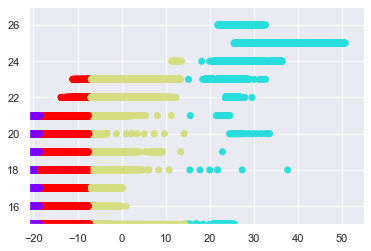

In [27]:
#same plot different view
plt.scatter(df_clusters['temperature'],df_clusters['device_id'],c=df_clusters['Cluster'],cmap='rainbow')
plt.xlim(-21,55)
plt.ylim(15,27)
plt.show()

In [28]:
df_clusters.Cluster



0          2
1          2
2          2
3          2
4          2
          ..
1519536    0
1519537    0
1519538    0
1519539    2
1519540    0
Name: Cluster, Length: 1519541, dtype: int32

In [29]:
max(df_clusters.Cluster)

3

In [30]:
#Creating 4 dataframe for 4 clusters
df_tp0=df_clusters[df_clusters.Cluster==0]
df_tp1=df_clusters[df_clusters.Cluster==1]
df_tp2=df_clusters[df_clusters.Cluster==2]
df_tp3=df_clusters[df_clusters.Cluster==3]

In [42]:
#temperature mean of 'df_tp1' dataframe
df_tp1.temperature.mean()

27.415741117329862

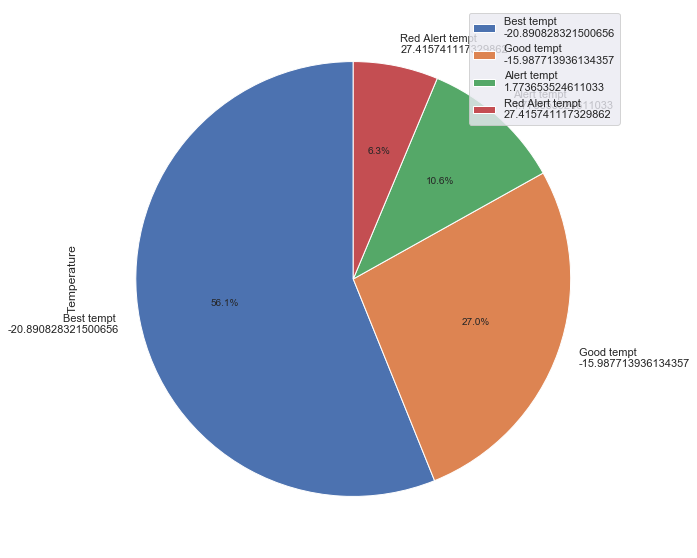

In [58]:
from pandas import DataFrame
# df_tp0.door.count() is the size of 'df_tp0' dataframe size, to determaine how much each cluster belong of the pie. i used 'door' , you can use any other columns.
Data = {'Temperature': [df_tp0.door.count(),df_tp3.door.count(),df_tp2.door.count(),df_tp1.door.count()]}
df_tempt = DataFrame(Data,columns=['Temperature'],index = ['Best tempt \n'+str(df_tp0.temperature.mean()),'Good tempt \n'+str(df_tp3.temperature.mean()),'Alert tempt \n'+str(df_tp2.temperature.mean()), 'Red Alert tempt \n'+str(df_tp1.temperature.mean())])

df_tempt.plot.pie(y='Temperature',figsize=(10, 10),autopct='%1.1f%%', startangle=90)

In [33]:
max(df_tp2.temperature)

14.5

In [102]:
import datetime as datetime
#lets take datetime column, i mean "created_at"
crt_date=df.created_at
crt_date

0          2019-08-07 22:12:08
1          2019-08-07 22:16:56
2          2019-08-07 22:19:39
3          2019-08-07 22:20:44
4          2019-08-07 22:21:50
                  ...         
1519536    2019-12-11 19:16:17
1519537    2019-12-11 19:16:20
1519538    2019-12-11 19:16:20
1519539    2019-12-11 19:16:21
1519540    2019-12-11 19:16:21
Name: created_at, Length: 1519541, dtype: object

In [99]:
#determining how many days data we have got.
date_format = "%Y-%m-%d"
a = datetime.strptime(crt_date[0].split()[0], date_format)
b = datetime.strptime(crt_date[1519539].split()[0], date_format)
delta = b - a
print (str(delta.days) +" days")


126 days


In [104]:
126/31

4.064516129032258

In [2]:
1519539/4


379884.75

In [112]:
#slicing into 4 dataframe, each on representing around a month.
frst_mnth=df1.iloc[0:379885,:]
scnd_mnth=df1.iloc[379885:759770,:]
thrd_mnth=df1.iloc[759770:1139655,:]
frth_mnth=df1.iloc[1139655:1519539,:]
frth_mnth

device_id  temperature  humidity  door           created_at  \
1139655         16        -18.9      94.7     0  2019-11-11 01:07:55   
1139656         12        -20.4      83.2     1  2019-11-11 01:07:56   
1139657         20        -19.3      76.1     0  2019-11-11 01:07:56   
1139658         15        -16.5      90.8     0  2019-11-11 01:08:07   
1139659         13        -19.5      91.9     0  2019-11-11 01:08:10   
...            ...          ...       ...   ...                  ...   
1519534         17        -20.7      97.6     0  2019-12-11 19:15:51   
1519535         14        -20.4      85.7     0  2019-12-11 19:15:57   
1519536         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538         20        -20.3      78.4     0  2019-12-11 19:16:20   

                  updated_at  
1139655  2019-11-11 01:07:55  
1139656  2019-11-11 01:07:56  
1139657  2019-11-11 01:07:56  
1139658  2019-11-11 01:08:07  
1139659  2019-11-11 01:08:10  
...                      ...  
1519534  2019-12-11 19:15:51  
1519535  2019-12-11 19:15:57  
1519536  2019-12-11 19:16:17  
1519537  2019-12-11 19:16:20  
1519538  2019-12-11 19:16:20  

[379884 rows x 6 columns]

In [120]:
y=frst_mnth.iloc[:,1:2]
kmns=KMeans(4)
kmns.fit(y)
idn_clusters=kmns.fit_predict(y)
df_clusters = frst_mnth.copy()
# Create a new Series, containing the identified cluster for each observation
df_clusters['Cluster'] = idn_clusters
df_tp0=df_clusters[df_clusters.Cluster==0]
df_tp1=df_clusters[df_clusters.Cluster==1]
df_tp2=df_clusters[df_clusters.Cluster==2]
df_tp3=df_clusters[df_clusters.Cluster==3]
from pandas import DataFrame
Data = {'Temperature': [df_tp0.door.count(),df_tp3.door.count(),df_tp2.door.count(),df_tp1.door.count()]}
df_tempt = DataFrame(Data,columns=['Temperature'],index = ['tempt \n'+str(df_tp0.temperature.mean()),'tempt \n'+str(df_tp3.temperature.mean()),'tempt \n'+str(df_tp2.temperature.mean()), 'tempt \n'+str(df_tp1.temperature.mean())])

df_tempt.plot.pie(y='Temperature',figsize=(10, 10),autopct='%1.1f%%', startangle=90)

In [119]:
y=scnd_mnth.iloc[:,1:2]
kmns=KMeans(4)
kmns.fit(y)
idn_clusters=kmns.fit_predict(y)
df_clusters = scnd_mnth.copy()
# Create a new Series, containing the identified cluster for each observation
df_clusters['Cluster'] = idn_clusters
df_tp0=df_clusters[df_clusters.Cluster==0]
df_tp1=df_clusters[df_clusters.Cluster==1]
df_tp2=df_clusters[df_clusters.Cluster==2]
df_tp3=df_clusters[df_clusters.Cluster==3]
from pandas import DataFrame
Data = {'Temperature': [df_tp0.door.count(),df_tp3.door.count(),df_tp2.door.count(),df_tp1.door.count()]}
df_tempt = DataFrame(Data,columns=['Temperature'],index = ['tempt \n'+str(df_tp0.temperature.mean()),'tempt \n'+str(df_tp3.temperature.mean()),'tempt \n'+str(df_tp2.temperature.mean()), 'tempt \n'+str(df_tp1.temperature.mean())])

df_tempt.plot.pie(y='Temperature',figsize=(10, 10),autopct='%1.1f%%', startangle=90)

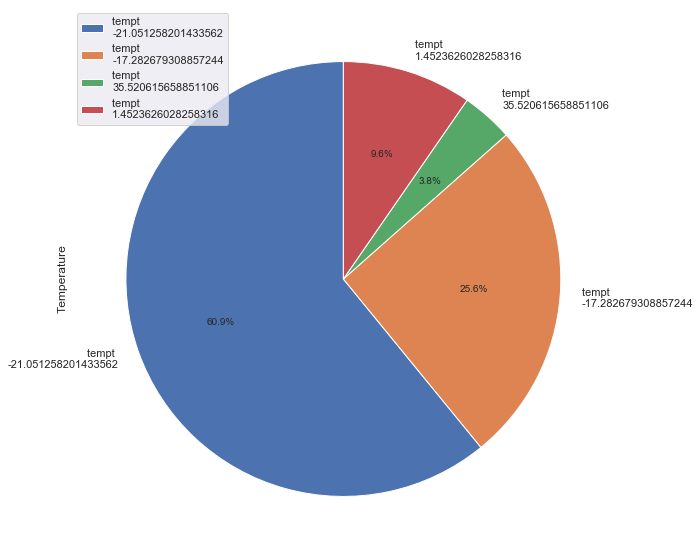

In [118]:
y=thrd_mnth.iloc[:,1:2]
kmns=KMeans(4)
kmns.fit(y)
idn_clusters=kmns.fit_predict(y)
df_clusters = thrd_mnth.copy()
# Create a new Series, containing the identified cluster for each observation
df_clusters['Cluster'] = idn_clusters
df_tp0=df_clusters[df_clusters.Cluster==0]
df_tp1=df_clusters[df_clusters.Cluster==1]
df_tp2=df_clusters[df_clusters.Cluster==2]
df_tp3=df_clusters[df_clusters.Cluster==3]
from pandas import DataFrame
Data = {'Temperature': [df_tp0.door.count(),df_tp3.door.count(),df_tp2.door.count(),df_tp1.door.count()]}
df_tempt = DataFrame(Data,columns=['Temperature'],index = ['tempt \n'+str(df_tp0.temperature.mean()),'tempt \n'+str(df_tp3.temperature.mean()),'tempt \n'+str(df_tp2.temperature.mean()), 'tempt \n'+str(df_tp1.temperature.mean())])

df_tempt.plot.pie(y='Temperature',figsize=(10, 10),autopct='%1.1f%%', startangle=90)

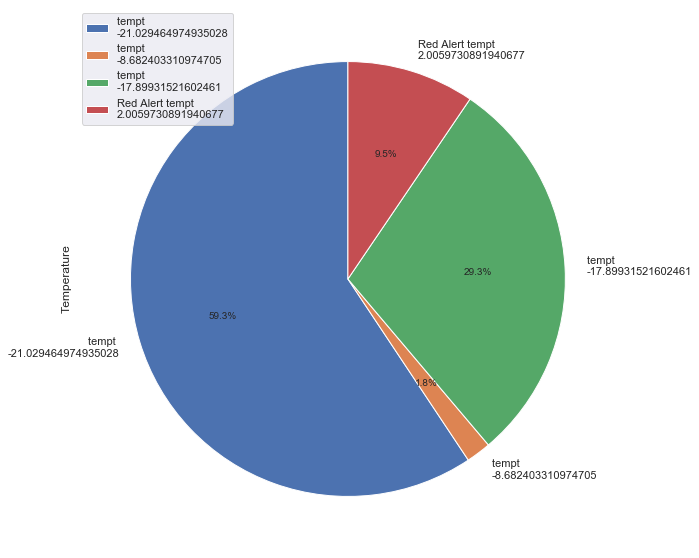

In [117]:
y=frth_mnth.iloc[:,1:2]
kmns=KMeans(4)
kmns.fit(y)
idn_clusters=kmns.fit_predict(y)
df_clusters = frth_mnth.copy()
# Create a new Series, containing the identified cluster for each observation
df_clusters['Cluster'] = idn_clusters
df_tp0=df_clusters[df_clusters.Cluster==0]
df_tp1=df_clusters[df_clusters.Cluster==1]
df_tp2=df_clusters[df_clusters.Cluster==2]
df_tp3=df_clusters[df_clusters.Cluster==3]
from pandas import DataFrame
Data = {'Temperature': [df_tp0.door.count(),df_tp3.door.count(),df_tp2.door.count(),df_tp1.door.count()]}
df_tempt = DataFrame(Data,columns=['Temperature'],index = ['tempt \n'+str(df_tp0.temperature.mean()),'tempt \n'+str(df_tp3.temperature.mean()),'tempt \n'+str(df_tp2.temperature.mean()), 'tempt \n'+str(df_tp1.temperature.mean())])

df_tempt.plot.pie(y='Temperature',figsize=(10, 10),autopct='%1.1f%%', startangle=90)

In [121]:
df

device_id  temperature  humidity  door           created_at  \
0               16          1.0      68.7     1  2019-08-07 22:12:08   
1               16         -2.6      78.6     1  2019-08-07 22:16:56   
2               16         -3.5      80.5     1  2019-08-07 22:19:39   
3               16         -3.8      82.0     1  2019-08-07 22:20:44   
4               16         -4.0      82.7     1  2019-08-07 22:21:50   
...            ...          ...       ...   ...                  ...   
1519536         15        -21.6      87.2     0  2019-12-11 19:16:17   
1519537         12        -21.0      80.8     0  2019-12-11 19:16:20   
1519538         20        -20.3      78.4     0  2019-12-11 19:16:20   
1519539         22         -1.4      96.4     0  2019-12-11 19:16:21   
1519540         21        -19.8      99.9     0  2019-12-11 19:16:21   

                  updated_at  
0        2019-08-07 22:12:08  
1        2019-08-07 22:16:56  
2        2019-08-07 22:19:39  
3        2019-08-07 22:20:44  
4        2019-08-07 22:21:50  
...                      ...  
1519536  2019-12-11 19:16:17  
1519537  2019-12-11 19:16:20  
1519538  2019-12-11 19:16:20  
1519539  2019-12-11 19:16:21  
1519540  2019-12-11 19:16:21  

[1519541 rows x 6 columns]

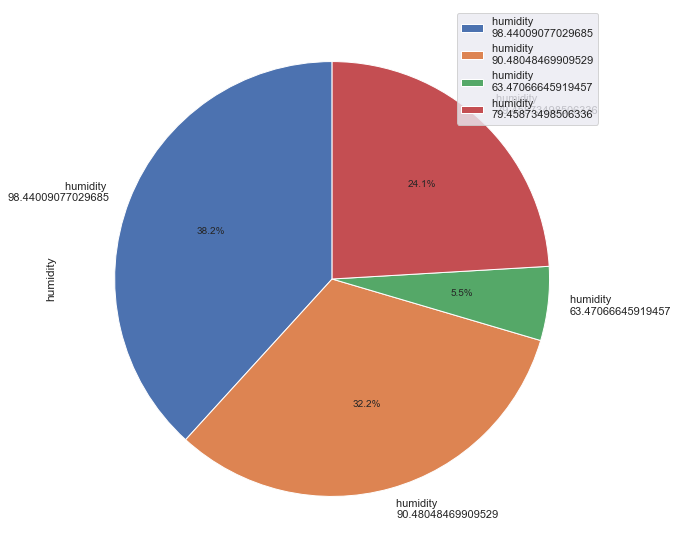

In [125]:
y=df.iloc[:,2:3]
kmns=KMeans(4)
kmns.fit(y)
idn_clusters=kmns.fit_predict(y)
df_clusters = df.copy()
# Create a new Series, containing the identified cluster for each observation
df_clusters['Cluster'] = idn_clusters
df_tp0=df_clusters[df_clusters.Cluster==0]
df_tp1=df_clusters[df_clusters.Cluster==1]
df_tp2=df_clusters[df_clusters.Cluster==2]
df_tp3=df_clusters[df_clusters.Cluster==3]
from pandas import DataFrame
Data = {'humidity': [df_tp0.door.count(),df_tp3.door.count(),df_tp2.door.count(),df_tp1.door.count()]}
df_tempt = DataFrame(Data,columns=['humidity'],index = ['humidity \n'+str(df_tp0.humidity.mean()),'humidity \n'+str(df_tp3.humidity.mean()),'humidity \n'+str(df_tp2.humidity.mean()), 'humidity \n'+str(df_tp1.humidity.mean())])

df_tempt.plot.pie(y='humidity',figsize=(10, 10),autopct='%1.1f%%', startangle=90)

In [139]:
door_open=df.temperature[df.door==1].count()
door_close=df.temperature[df.door==0].count()


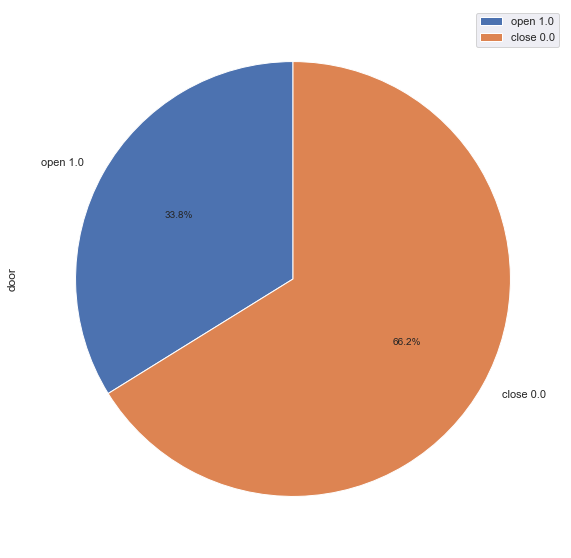

In [144]:
from pandas import DataFrame
Data = {'door': [door_open,door_close]}
df_tempt = DataFrame(Data,columns=['door'],index = ['open '+str(df.door[df.door==1].mean()),'close '+str(df.door[df.door==0].mean()) ,])

df_tempt.plot.pie(y='door',figsize=(10, 10),autopct='%1.1f%%', startangle=90)